<a href="https://colab.research.google.com/github/Lakshya2031/Spam_mail_detector_2/blob/main/Mail_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [ ]:
# Data Collection and Process it

In [ ]:
df=pd.read_csv("/content/mail_data.csv")

In [ ]:
print(df.head())

  Category                                            Message
0      ham  Go until jurong point, crazy.. Available only ...
1      ham                      Ok lar... Joking wif u oni...
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...
3      ham  U dun say so early hor... U c already then say...
4      ham  Nah I don't think he goes to usf, he lives aro...


In [ ]:
df.isnull().sum()

,0
Category,0
Message,0


In [ ]:
df[df.duplicated()==True]

,Category,Message
103,ham,As per your request 'Melle Melle (Oru Minnamin...
154,ham,As per your request 'Melle Melle (Oru Minnamin...
207,ham,"As I entered my cabin my PA said, '' Happy B'd..."
223,ham,"Sorry, I'll call later"
326,ham,No calls..messages..missed calls
...,...,...
5524,spam,You are awarded a SiPix Digital Camera! call 0...
5535,ham,"I know you are thinkin malaria. But relax, chi..."
5539,ham,Just sleeping..and surfing
5553,ham,Hahaha..use your brain dear


In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

np.int64(0)

In [ ]:
# Label Encoding- spam mail as 0 , ham mail as 1

In [ ]:
df['Category']=df['Category'].apply(lambda x:1 if x=='ham' else 0)

In [ ]:
print(df.head())

   Category                                            Message
0         1  Go until jurong point, crazy.. Available only ...
1         1                      Ok lar... Joking wif u oni...
2         0  Free entry in 2 a wkly comp to win FA Cup fina...
3         1  U dun say so early hor... U c already then say...
4         1  Nah I don't think he goes to usf, he lives aro...


In [ ]:
print(df['Category'].value_counts())
df_1=df[df['Category']==1].sample(1000)

df_2=df[df['Category']==0]
df_3=pd.concat([df_1,df_2],ignore_index=True)
print(df_3)

Category
1    4516
0     641
Name: count, dtype: int64
      Category                                            Message
0            1                    will you like to be spoiled? :)
1            1           Hmmm.but you should give it on one day..
2            1         Thanks love. But am i doing torch or bold.
3            1  Did I forget to tell you ? I want you , I need...
4            1    Since when, which side, any fever, any vomitin.
...        ...                                                ...
1636         0  Want explicit SEX in 30 secs? Ring 02073162414...
1637         0  ASKED 3MOBILE IF 0870 CHATLINES INCLU IN FREE ...
1638         0  Had your contract mobile 11 Mnths? Latest Moto...
1639         0  REMINDER FROM O2: To get 2.50 pounds free call...
1640         0  This is the 2nd time we have tried 2 contact u...

[1641 rows x 2 columns]


In [ ]:
X=df_3['Message']
Y=df_3['Category']

In [ ]:
# Splitting the data into training data and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=3)

In [ ]:
print(X_train.shape)

(1312,)


In [ ]:
# Feature Extraction

In [ ]:
feature_extraction=TfidfVectorizer(min_df=1,stop_words='english',lowercase=True)

In [ ]:
X_train_features=feature_extraction.fit_transform(X_train)

In [ ]:
X_test_feature=feature_extraction.transform(X_test)
print(X_test_feature)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2606 stored elements and shape (329, 4129)>
  Coords	Values
  (0, 509)	0.38830745512963777
  (0, 777)	0.26888442990898126
  (0, 1204)	0.2743489278582427
  (0, 1558)	0.2953782787295865
  (0, 2668)	0.367278104258294
  (0, 2796)	0.367278104258294
  (0, 2910)	0.352357542365284
  (0, 3160)	0.32333320334744153
  (0, 3640)	0.18807163190009368
  (0, 3727)	0.2838049918019912
  (1, 671)	0.2860782012113553
  (1, 1354)	0.34906134257120314
  (1, 1517)	0.32114950567769784
  (1, 1545)	0.35902350836446423
  (1, 1882)	0.35902350836446423
  (1, 2170)	0.3333422112084074
  (1, 2299)	0.2401936914762201
  (1, 3203)	0.2989946343537272
  (1, 3263)	0.2197202031481081
  (1, 3396)	0.35902350836446423
  (2, 2250)	0.5261485543952907
  (2, 2639)	0.42441658987248987
  (2, 3777)	0.5856563054589712
  (2, 3945)	0.44726384699067784
  (3, 3203)	0.5326521247643863
  :	:
  (326, 3768)	0.27512727037936496
  (326, 4038)	0.2145928112494989
  (327, 51)	0.25504956997

In [ ]:
Y_train.dtype

dtype('int64')

In [ ]:
Y_test.dtype

dtype('int64')

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train_features,Y_train)

LogisticRegression()

In [ ]:
# Evaluating the train model

In [ ]:
predicted=model.predict(X_test_feature)

In [ ]:
print(predicted)

[0 1 0 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1 0 1 1 1 1 1 1
 0 0 0 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 1 0 1 0 0 1
 1 1 1 1 0 0 1 1 1 0 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 0 1 0 1
 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 0 0 1 0 1 0 0 1 1 1 1 0 0 1 0 0 1 1
 0 0 1 0 0 1 0 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 0 0 1 1 1 1 1 0 1 1 0
 0 0 0 0 1 1 0 1 0 1 1 1 0 1 1 0 1 1 0 1 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 1 1
 1 1 1 0 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 1 1 1 0
 1 0 0 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1 1 1 1 1 1 0 0 0 1 1 1
 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 0 0]


In [ ]:
accuracy_percent=accuracy_score(predicted,Y_test)*100

In [ ]:
print(accuracy_percent)

96.35258358662614


In [ ]:
a_i=['Dear LAKSHYA SARASWAT,Greetings from O.P. Jindal Global University (JGU).  Congratulations! CUET Results are out!You can apply to O.P. Jindal Global University with your CUET scores and get access to: Global curriculum and an education beyond classrooms Internship opportunitiesWorld-class faculty  State-of-the-art campus, sports and recreational facilitiesStudy abroad opportunities From architecture, psychology, international relations, economics, public policy to environment & sustainability, liberal arts, journalism, films and more, JGU is here to help you attain all your dreams and aspirations.To know more about our programmes']
b_i=model.predict(feature_extraction.transform(a_i))
print(b_i)

[1]


In [ ]:
import pickle
pickle.dump(model, open('spam_model1.pkl', 'wb'))
pickle.dump(feature_extraction, open('feature_extraction1.pkl', 'wb'))

In [ ]:
!pip install mlxtend

In [ ]:
from mlxtend.plotting import plot_decision_regions

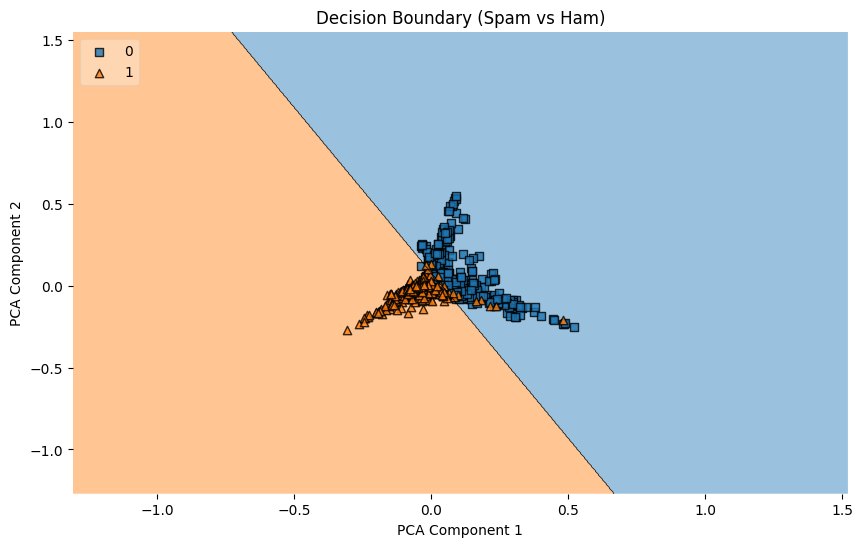

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train_features.toarray())

# Train model
clf = LogisticRegression()
clf.fit(X_train_pca, Y_train)


# Plot
plt.figure(figsize=(10,6))
plot_decision_regions(X_train_pca, Y_train.values, clf=clf, legend=2)
plt.title("Decision Boundary (Spam vs Ham)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()